<a href="https://colab.research.google.com/github/KimSeonHo-719/CV/blob/main/%EA%B3%BC%EC%A0%9C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget 'https://raw.githubusercontent.com/KimSeonHo-719/CV/main/gyujin.png' -O gyujin.png

--2025-04-06 06:37:30--  https://raw.githubusercontent.com/KimSeonHo-719/CV/main/gyujin.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222295 (217K) [image/png]
Saving to: ‘gyujin.png’

gyujin.png          100%[===================>] 217.08K  --.-KB/s    in 0.03s   

2025-04-06 06:37:31 (7.59 MB/s) - ‘gyujin.png’ saved [222295/222295]



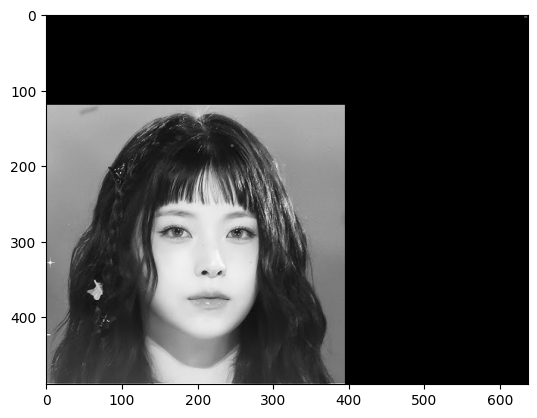

In [3]:
img_BGR=cv2.imread('/content/gyujin.png')
img_GRAY = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2GRAY)
plt.imshow(img_GRAY,cmap='gray')

In [6]:
# Salt and Pepper Noise 추가하기
def saltpepper(img):

  # 아웃풋 변수로 이미지 복사본을 받아서 진행
  output=np.copy(img)

  # 전체 이미지 중 노이즈 20% (Salt 10%, Pepper 10% 로 설정하였음)
  salt=0.1
  pepper=0.1

  # 랜덤 행렬 생성
  # 각 픽셀에 0~1 사이의 난수 생성하여 이것을 기준으로 노이즈 넣을지 결정
  random=np.random.rand(*img.shape[:2])

  # Salt Noise 랜덤 추가
  output[random<salt]=255

  # Pepper Noise 랜덤 추가
  output[random>1-pepper]=0

  return output

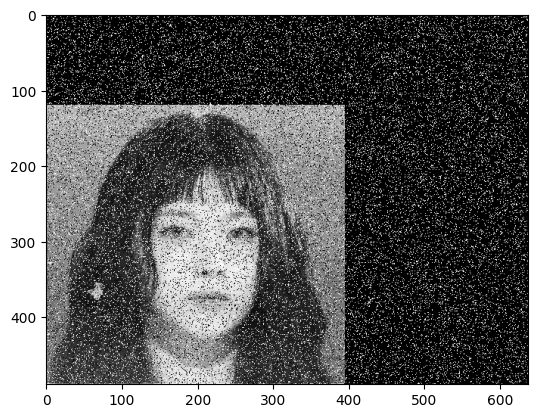

In [7]:
plt.imshow(saltpepper(img_GRAY),cmap='gray')

In [8]:
# Convolution
def conv(img, kernel):
    h, w = kernel.shape
    img_h, img_w = h//2, w//2

    padding=np.pad(img,((img_h,img_h),(img_w,img_w)),mode='reflect')
    output=np.zeros_like(img,dtype=np.float32)

    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        region=padding[i:i+h,j:j+w]
        output[i,j]=np.sum(region*kernel)

    return output

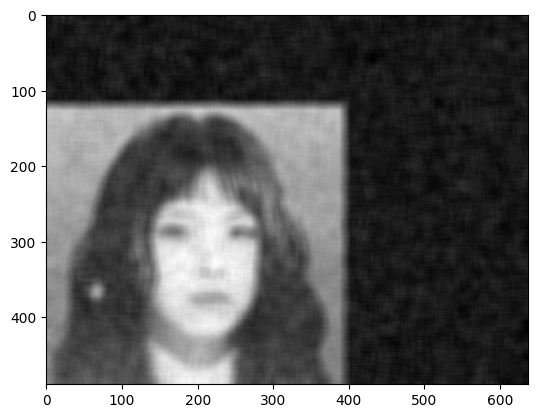

In [10]:
# Average Filter 15x15
# 눈코입의 형체만 보이고 자세히는 보이지 않는다.
# 하지만 노이즈도 아예 없어지는 것은 아니고 엄청 뭉개진 것을 볼 수 있다.
kernel15=np.ones((15,15),dtype=np.float32)/225
result15=conv(saltpepper(img_GRAY),kernel15)
plt.imshow(result15,cmap='gray')

In [11]:
# Median Filter
def median(img,size):
  pad=size//2

  padding=np.pad(img,((pad,pad),(pad,pad)),mode='reflect')
  output=np.zeros_like(img)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      window=padding[i:i+size,j:j+size]
      output[i,j]=np.median(window)

  return output

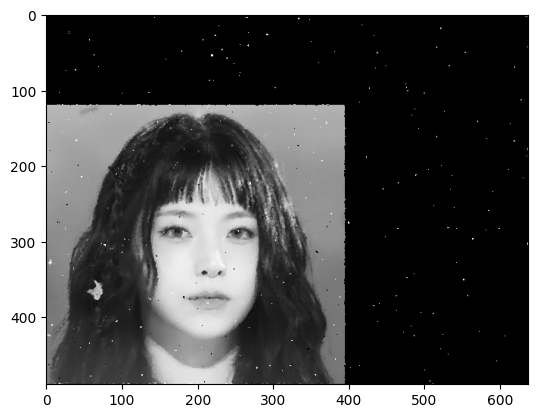

In [12]:
# Median Filter 3x3
# 약간의 노이즈가 남아있고 얼굴은 원본과 거의 비슷한 상태이다.
result3=median(saltpepper(img_GRAY),3)
plt.imshow(result3,cmap='gray')

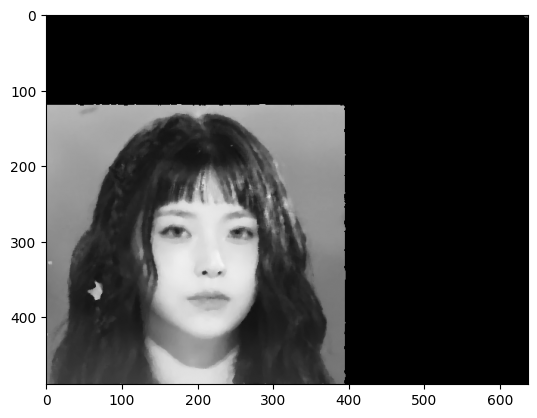

In [13]:
# Medain Filter 5x5
# 노이즈가 거의 보이지 않는다.
result5=median(saltpepper(img_GRAY),5)
plt.imshow(result5,cmap='gray')

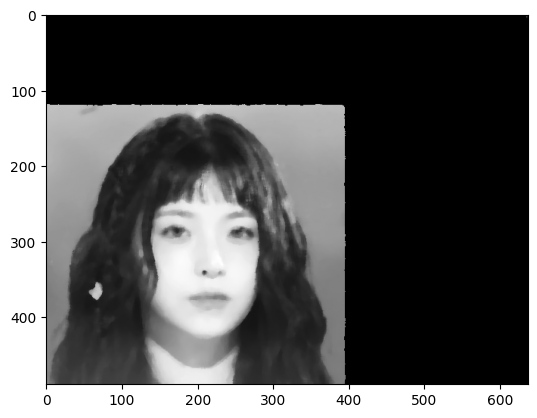

In [14]:
# Median Filter 7x7
# 노이즈는 아예 보이지 않는다.
# 하지만 이때부터 얼굴과 머리카락의 경계가 점점 뭉개지기 시작한다.
result7=median(saltpepper(img_GRAY),7)
plt.imshow(result7,cmap='gray')

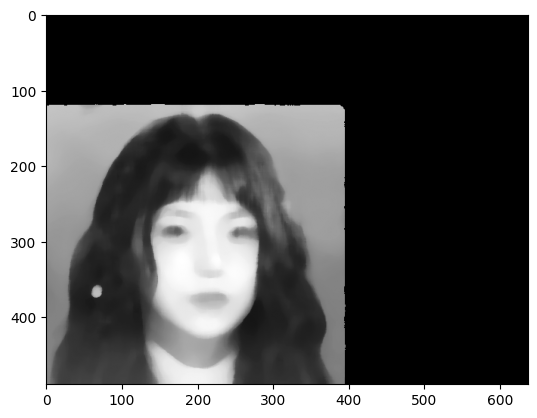

In [16]:
# Median Filter 15x15
# 얼굴도 보이지 않을 정도이다.
result15=median(saltpepper(img_GRAY),15)
plt.imshow(result15,cmap='gray')